# Locate-Me
## GDG-VIT 2 Credit Project
## 1. Find the details of people who are currently on the International Space Station and mark the current position of the ISS overhead Earth’s map.

In [1]:
# importing requests library to fetch API content
import requests
# importng pprint for pretty printing of dictionaries
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Getting details of people currently at International Space Station

In [2]:
# Get the response from the API endpoint.
response = requests.get("http://api.open-notify.org/astros.json")
# Print the status code of the response
print "Status Code:",response.status_code
# Convert to dictionary
data = response.json()
print "Data type: ",type(data)
print "Response"
pp.pprint(data)

Status Code: 200
Data type:  <type 'dict'>
Response
{   u'message': u'success',
    u'number': 3,
    u'people': [   {   u'craft': u'ISS', u'name': u'Anton Shkaplerov'},
                   {   u'craft': u'ISS', u'name': u'Scott Tingle'},
                   {   u'craft': u'ISS', u'name': u'Norishige Kanai'}]}


In [3]:
print "There are",data["number"],"people at ISS"
print "They are"
for i in range(data["number"]):
    print "\t",data["people"][i]["name"]

There are 3 people at ISS
They are
	Anton Shkaplerov
	Scott Tingle
	Norishige Kanai


### Getting position of ISS real time

In [4]:
# Making a get request to get the latest position of the ISS from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")

print "Status Code:",response.status_code
print "Response"
data = response.json()
pp.pprint(data)

Status Code: 200
Response
{   u'iss_position': {   u'latitude': u'39.8734', u'longitude': u'160.6039'},
    u'message': u'success',
    u'timestamp': 1521628340}


In [5]:
import datetime
latitude = data['iss_position']['latitude']
longitude = data['iss_position']['longitude']
timestamp = datetime.datetime.fromtimestamp(data['timestamp'])
date = timestamp.strftime('%Y-%m-%d')
time = timestamp.strftime('%H:%M:%S')
print 'Date: ',date
print 'Time: ',time
print 'Latitude: ',latitude
print 'Longitude: ',longitude

Date:  2018-03-21
Time:  16:02:20
Latitude:  39.8734
Longitude:  160.6039


### Plotting on World Map ( Robinson Projection )

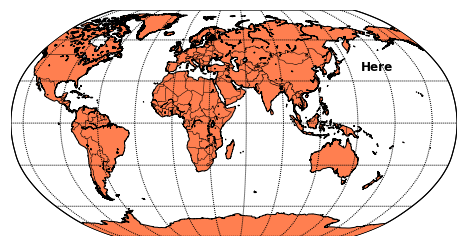

In [8]:
## The Robinson projection is a map projection of a world map which shows the entire world at once. 

# importing basemap for plotting
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setting size of the plot
plt.figure(figsize=(8,8))

map = Basemap(projection='robin', lat_0=0, lon_0=50,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines() 
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# Convert latitude and longitude into x/y co-ordinates
x, y = map(longitude, latitude)

plt.text(x, y, 'Here',fontsize=12,fontweight='bold',
                    ha='left',va='center',color='black')

plt.show()

### Plotting on World Map ( Orthogonal Projection )

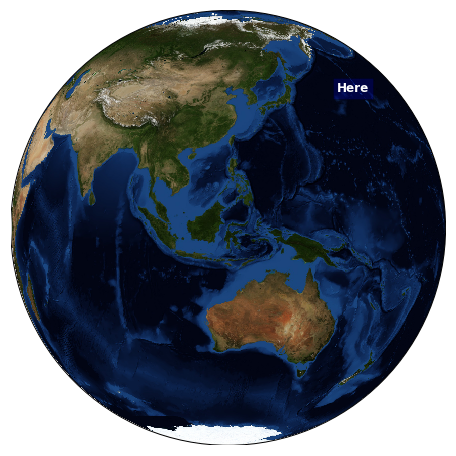

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=120)
map.bluemarble(scale=0.5);

x, y = map(longitude, latitude)

plt.text(x, y, 'Here',fontsize=12,fontweight='bold',
                    ha='left',va='center',color='w',
                    bbox=dict(facecolor='b', alpha=0.2))
plt.show()